The Flux through the surface area in question is 1343.975075 Watts
The calculated black body T without A is 280 Kelvin but the one with it is 253.782430 Kelvin

Estimeate is high according to empirical data. The calculation gives T after greenhouse gases as 342.910858 Kelvin 
This is clearly off as that implies 54.91 degree Celsius difference which is over 130.8 degrees Fahrenheit

From Flux = sigma*T**4 and sigma being related to B(lambda,T) = (2hc**2/lambda**5)/e**(hc/lambda*k*T)-1
we end up with a Flux integral of (1-a(lambda))*B(lambda,T)*dlambda form 0 to inf. I will call that F_l.
Finally we just plug F_l back into the equation of T from 1b. This gets: 
((1-A)*(np.pi*R_e**2)*quad(F_l,0,np.inf))/((1-(1-A))*(boltz)*4*(np.pi*R_e**2)))**(0.25)

From the provided diagrams we see that water vapor is the most influential in correlation to absorbtion
but the one that is distinct and will alter more direclty is Carbon Dioxide. This is due to weather keeping a
relatively constant H20 conte

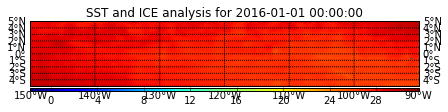

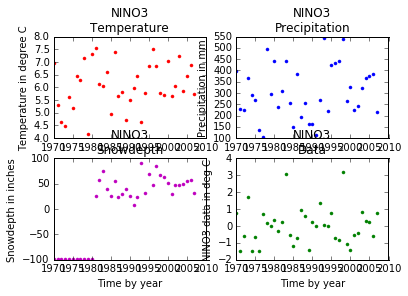

The largest NINO evetns appear to be 1983,1997,1972,2002,and 1987 from the data. I cannot seem to make the graphs larger without causing and error.

Although it is difficult to tell and I was unable to use the correct analysis method for raw data due to coding issues.
I have noted only two events appear consisten within the precipitation and a few more in the Temperature data.
I would postulate a low correlation for both based soley on this graphical plotting.

According to the scipy pearsonr fucntion the Temperature, Precipitation, and Snowfall Correlate as follows:
Temp = 0.005112, Pecip = 0.377122, Snow = 0.141972


In [8]:
#Assignment 8, Cameron Ha
import matplotlib
import numpy as np
import scipy
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, date2index
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import pearsonr

%matplotlib inline

#Global Variables
year,temp,prec,snow,NINO3 = np.loadtxt(open("calidata_final.dat"), skiprows = 0, unpack = True)
T_sun = 5777
M_sun = 2.0E30
R_sun = 7.0E8
R_e = 6.4E6
boltz = 5.67E-8
h = 6.62E-34
eV = 1.60E-19
L_s = 3.8E26
AU = 1.50E11
A = 0.3

#Question 1
F_e = L_s/(4*np.pi*AU**2)
T_1a = (((1-A)*(np.pi*R_e**2)*F_e)/((boltz)*4*(np.pi*R_e**2)))**(0.25)
T_1b = (((1-A)*(np.pi*R_e**2)*F_e)/((1-(1-A))*(boltz)*4*(np.pi*R_e**2)))**(0.25)

print "The Flux through the surface area in question is %f Watts" %F_e
print "The calculated black body T without A is 280 Kelvin but the one with it is %f Kelvin\n" %(T_1a)
print "Estimeate is high according to empirical data. The calculation gives T after greenhouse gases as %f Kelvin " %(T_1b)
print "This is clearly off as that implies 54.91 degree Celsius difference which is over 130.8 degrees Fahrenheit\n"
print "From Flux = sigma*T**4 and sigma being related to B(lambda,T) = (2hc**2/lambda**5)/e**(hc/lambda*k*T)-1"
print "we end up with a Flux integral of (1-a(lambda))*B(lambda,T)*dlambda form 0 to inf. I will call that F_l."
print "Finally we just plug F_l back into the equation of T from 1b. This gets: \n((1-A)*(np.pi*R_e**2)*quad(F_l,0,np.inf))/((1-(1-A))*(boltz)*4*(np.pi*R_e**2)))**(0.25)\n"
print "From the provided diagrams we see that water vapor is the most influential in correlation to absorbtion"
print "but the one that is distinct and will alter more direclty is Carbon Dioxide. This is due to weather keeping a"
print "relatively constant H20 content but the CO2 is trending toward an increase.\n"
print "The trend sows an increase over itme but we may not necessarily be in trouble yet. The current levels are tolerable"
print "and there are some theory that not this trend is the only thing previnrintg the next ice age. Additonally"
print "it is possible that we are only seeing part of a geological age cycle which may take over a million years to"
print "cylce through completely.  Without more detailed research one cannot be certain.\n"
print "\n"
print "\n"

#Basemap Plot
date = datetime(2016,1,1,0) # date to plot.
# open dataset.
dataset = \
Dataset('http://www.ncdc.noaa.gov/thredds/dodsC/OISST-V2-AVHRR_agg')
timevar = dataset.variables['time']
timeindex = date2index(date,timevar) # find time index for desired date.
# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
sst = dataset.variables['sst'][timeindex,:].squeeze()
# read ice.
ice = dataset.variables['ice'][timeindex,:].squeeze()
# read lats and lons (representing centers of grid boxes).
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
lons, lats = np.meshgrid(lons,lats)
# create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create Basemap instance.
# coastlines not used, so resolution set to None to skip
# continent processing (this speeds things up a bit)
m = Basemap(llcrnrlon=-150,llcrnrlat=-5,urcrnrlon=-90,urcrnrlat=5,projection='mill')
# draw line around map projection limb.
# color background of map projection region.
# missing values over land will show up this color.
m.drawmapboundary(fill_color='0.3')
# plot sst, then ice with pcolor
im1 = m.pcolormesh(lons,lats,sst,shading='flat',cmap=plt.cm.jet,latlon=True)
im2 = m.pcolormesh(lons,lats,ice,shading='flat',cmap=plt.cm.gist_gray,latlon=True)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,90.,1.),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180.,180.,10.),labels=[1,1,0,1])
# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
# add a title.
ax.set_title('SST and ICE analysis for %s'%date)
plt.show()

#NINO3 Plot
plt.figure()

plt.subplot(221)
plt.plot(year,temp,'r.')
plt.xlabel('Time by year')
plt.ylabel('Temperature in degree C')
plt.title("NINO3\nTemperature")

plt.subplot(222)
plt.plot(year,prec,'b.')
plt.xlabel('Time by year')
plt.ylabel('Precipitation in mm')
plt.title("NINO3\nPrecipitation")

plt.subplot(223)
plt.plot(year,snow,'m.')
plt.xlabel('Time by year')
plt.ylabel('Snowdepth in inches')
plt.title("NINO3\nSnowdepth")

plt.subplot(224)
plt.plot(year,NINO3,'g.')
plt.xlabel('Time by year')
plt.ylabel('NINO3 data in deg C')
plt.title("NINO3\nData")

plt.show()


#Question 2
print "The largest NINO evetns appear to be 1983,1997,1972,2002,and 1987 from the data. I cannot seem to make the graphs larger without causing and error.\n"
print "Although it is difficult to tell and I was unable to use the correct analysis method for raw data due to coding issues."
print "I have noted only two events appear consisten within the precipitation and a few more in the Temperature data."
print "I would postulate a low correlation for both based soley on this graphical plotting.\n"

r_T = pearsonr(temp,NINO3) # unclaer which is sigma and which is r so assumed r first
r_P = pearsonr(prec,NINO3)
r_S = pearsonr(snow,NINO3)

print "According to the scipy pearsonr fucntion the Temperature, Precipitation, and Snowfall Correlate as follows:"
print "Temp = %f, Pecip = %f, Snow = %f" %(r_T[0],r_P[0],r_S[0]) 
print "This indicates that they are all weak or moderate correlations. this may be the wrong value form the scipy so instead:"
print "Temp = %f, Pecip = %f, Snow = %f" %(r_T[1],r_P[1],r_S[1])
print "The second sets indicate the strong Temperature, moderate Precipitaion, and low Snow correlation.\n"
print "After watching the ENSO graphics it seems likely we are experienceing a warm event. It was somewhat hard to tell."